# YOUR PROJECT TITLE

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **data analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `dataproject.py` file includes a function which will be used multiple times in this notebook.

Imports and set magics:

In [450]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import seaborn as sb #Graphical package
from pylab import *
from matplotlib.font_manager import FontProperties
import os
pd.set_option('display.max_rows', 30)
from cycler import cycler

# Local modules
import dataproject



# Read and clean data

## Employment data

**Read the employment data** in ``RAS200.xlsx`` and **clean it** removing and renaming columns:

In [451]:
wage = pd.read_excel('DST wage.xlsx', skiprows=2) #load data
wage.head() # look at data
drop_these = ['Unnamed: ' + str(num) for num in range (4)]
wage.drop(drop_these, axis=1, inplace=True)
wage.rename(columns = {'Unnamed: 4' : 'Region'}, inplace=True)#change name in first column
wage.head(100)



,Region,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
1,Landsdel Byen København,24572,23756,25208,26219,26517,26641,27629,27786,27817,...,21845,21156,20484,20779,20814,20865,20686,21554,22024,22658
2,Landsdel Københavns omegn,23849,22637,23288,24545,24718,25254,26228,27396,27692,...,21705,21323,20950,20809,20188,20288,21421,22093,23020,23468
3,Landsdel Nordsjælland,22796,21666,22400,23610,24122,24954,26104,26227,26436,...,21413,20947,20474,20473,20794,21077,21649,22549,23711,24192
4,Landsdel Bornholm,23330,21485,24055,24744,23824,23836,23327,23652,23734,...,25769,26378,25801,26101,28579,29253,31359,33617,35205,36054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Landsdel Nordjylland,161748,162386,175053,182285,188792,197525,203885,210181,217738,...,292042,300380,311469,317391,321429,329209,333633,345065,351064,360766
96,Region Hovedstaden,197182,198906,210240,215723,222496,230334,241088,250794,263191,...,377919,387702,400378,410977,423056,434354,447055,457763,471465,484192
97,Landsdel Byen København,170425,172223,181599,184654,191210,197232,208210,216896,227129,...,324784,336140,348109,359348,373426,385398,399187,417255,433678,449628
98,Landsdel Københavns omegn,206320,208647,220950,227031,233332,242132,254237,264635,277708,...,398013,407197,419604,430167,443342,454256,470008,478014,490441,503373


The dataset now looks like this:

In [452]:
#Build up a logical index I
I = wage.Region.str.contains('Landsdel')
wage.loc[I, :]

,Region,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Landsdel Byen København,24572,23756,25208,26219,26517,26641,27629,27786,27817,...,21845,21156,20484,20779,20814,20865,20686,21554,22024,22658
2,Landsdel Københavns omegn,23849,22637,23288,24545,24718,25254,26228,27396,27692,...,21705,21323,20950,20809,20188,20288,21421,22093,23020,23468
3,Landsdel Nordsjælland,22796,21666,22400,23610,24122,24954,26104,26227,26436,...,21413,20947,20474,20473,20794,21077,21649,22549,23711,24192
4,Landsdel Bornholm,23330,21485,24055,24744,23824,23836,23327,23652,23734,...,25769,26378,25801,26101,28579,29253,31359,33617,35205,36054
6,Landsdel Østsjælland,24223,23029,24241,25048,25486,25918,26947,26721,27071,...,22541,21388,21040,20907,21318,21450,21809,23132,24430,24323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,Landsdel Fyn,1887,1904,2543,2422,2807,2869,2795,2561,2541,...,3657,4026,4084,6398,5005,5733,5720,7914,7226,10672
202,Landsdel Sydjylland,1906,1663,2408,2434,2905,2954,3038,2924,3338,...,3358,4635,5139,5707,5786,5908,5994,8105,8369,9472
204,Landsdel Østjylland,1745,1829,2453,2504,2783,2689,3219,3265,2887,...,4526,5737,6577,8043,8442,10558,10067,11427,13139,13429
205,Landsdel Vestjylland,1760,1738,2129,2651,2964,3338,3212,3131,3186,...,4429,4653,6013,6713,6195,7531,7855,8941,11958,10614


**Remove all rows which are not municipalities**:

In [453]:
wage = wage.loc[I == False] # keep everything else
wage.head(10)



,Region,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
5,Region Sjælland,23257,22071,23031,23918,24249,24849,25424,25383,25537,...,22862,22588,21750,21734,22022,22283,22506,23745,25497,26142
8,Region Syddanmark,24296,23025,24617,26357,26015,26504,27260,26930,27096,...,25284,24759,23539,23543,23786,23704,24361,25200,27351,28394
11,Region Midtjylland,24563,23554,24865,26190,25877,26406,26729,26589,26635,...,24483,24059,23114,22865,23232,23394,24050,25332,26409,26987
14,Region Nordjylland,24161,23023,24239,25639,25585,26476,27340,26573,26152,...,25798,25736,24546,24384,24645,24927,25294,26624,28398,29148
16,Region Hovedstaden,83191,79425,83013,88858,91680,95165,99171,102325,104543,...,103008,98725,95693,94311,95006,98420,102466,105417,110673,113380
21,Region Sjælland,93431,90462,94567,100987,102974,106611,109860,112632,115299,...,116165,110734,106321,103199,103154,107356,112388,117202,123914,127878
24,Region Syddanmark,86796,84357,89916,96741,98599,102293,105881,106832,108783,...,112558,106496,102582,99530,101008,102501,103696,108994,116271,119899
27,Region Midtjylland,84702,81004,87362,93877,95311,98900,102367,103938,105050,...,105842,101007,96112,94703,96316,98685,101736,106193,112243,115292
30,Region Nordjylland,82865,79950,86968,93321,96287,100921,103321,103645,103396,...,108668,103679,100394,96738,95698,97025,101203,104161,110649,113277


In [454]:
#Add an age group column as the one provided in the excel file is unuseable
age=['15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','74+'] #List of age groups
age_group=list(np.repeat(age,5)) #Repeat 5 times (5 Regions)
wage['Age_group'] = age_group #Add as column
wage.head(100) #check

,Region,1992,1993,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Age_group
0,Region Hovedstaden,23687,22598,23582,24737,25021,25514,26492,27012,27197,...,21294,20786,20828,20790,20940,21493,22322,23183,23696,15-19
5,Region Sjælland,23257,22071,23031,23918,24249,24849,25424,25383,25537,...,22588,21750,21734,22022,22283,22506,23745,25497,26142,15-19
8,Region Syddanmark,24296,23025,24617,26357,26015,26504,27260,26930,27096,...,24759,23539,23543,23786,23704,24361,25200,27351,28394,15-19
11,Region Midtjylland,24563,23554,24865,26190,25877,26406,26729,26589,26635,...,24059,23114,22865,23232,23394,24050,25332,26409,26987,15-19
14,Region Nordjylland,24161,23023,24239,25639,25585,26476,27340,26573,26152,...,25736,24546,24384,24645,24927,25294,26624,28398,29148,15-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Region Hovedstaden,2555,2768,3368,3207,3485,3963,3648,3571,3572,...,5503,6587,7646,7989,8908,12224,12897,13734,16265,74+
197,Region Sjælland,2051,1920,2339,2698,2839,3023,3061,3342,2911,...,3687,4716,5903,6589,6122,7550,8196,8019,9476,74+
200,Region Syddanmark,1898,1769,2467,2429,2862,2917,2933,2768,2996,...,4383,4703,5992,5466,5836,5883,8028,7904,9960,74+
203,Region Midtjylland,1751,1795,2335,2558,2849,2925,3217,3216,2995,...,5335,6368,7552,7613,9440,9249,10505,12702,12394,74+


In [455]:
#Restructure so that age_group is before years
cols = list(wage.columns.values)
print(cols)
wage = wage[['Region', 'Age_group', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]
wage.head(10)

['Region', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', 'Age_group']


,Region,Age_group,1992,1993,1994,1995,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Region Hovedstaden,15-19,23687,22598,23582,24737,25021,25514,26492,27012,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
5,Region Sjælland,15-19,23257,22071,23031,23918,24249,24849,25424,25383,...,22862,22588,21750,21734,22022,22283,22506,23745,25497,26142
8,Region Syddanmark,15-19,24296,23025,24617,26357,26015,26504,27260,26930,...,25284,24759,23539,23543,23786,23704,24361,25200,27351,28394
11,Region Midtjylland,15-19,24563,23554,24865,26190,25877,26406,26729,26589,...,24483,24059,23114,22865,23232,23394,24050,25332,26409,26987
14,Region Nordjylland,15-19,24161,23023,24239,25639,25585,26476,27340,26573,...,25798,25736,24546,24384,24645,24927,25294,26624,28398,29148
16,Region Hovedstaden,20-24,83191,79425,83013,88858,91680,95165,99171,102325,...,103008,98725,95693,94311,95006,98420,102466,105417,110673,113380
21,Region Sjælland,20-24,93431,90462,94567,100987,102974,106611,109860,112632,...,116165,110734,106321,103199,103154,107356,112388,117202,123914,127878
24,Region Syddanmark,20-24,86796,84357,89916,96741,98599,102293,105881,106832,...,112558,106496,102582,99530,101008,102501,103696,108994,116271,119899
27,Region Midtjylland,20-24,84702,81004,87362,93877,95311,98900,102367,103938,...,105842,101007,96112,94703,96316,98685,101736,106193,112243,115292
30,Region Nordjylland,20-24,82865,79950,86968,93321,96287,100921,103321,103645,...,108668,103679,100394,96738,95698,97025,101203,104161,110649,113277


In [456]:
#Add an e to the year variable so that long-cobversion is easy
col_dict = {}
for i in range(1992, 2019+1): # range goes from 1992 to but not including 2020
    col_dict[str(i)] = f'e{i}' 
col_dict
wage.rename(columns = col_dict, inplace=True)
wage.head()

,Region,Age_group,e1992,e1993,e1994,e1995,e1996,e1997,e1998,e1999,...,e2010,e2011,e2012,e2013,e2014,e2015,e2016,e2017,e2018,e2019
0,Region Hovedstaden,15-19,23687,22598,23582,24737,25021,25514,26492,27012,...,21770,21294,20786,20828,20790,20940,21493,22322,23183,23696
5,Region Sjælland,15-19,23257,22071,23031,23918,24249,24849,25424,25383,...,22862,22588,21750,21734,22022,22283,22506,23745,25497,26142
8,Region Syddanmark,15-19,24296,23025,24617,26357,26015,26504,27260,26930,...,25284,24759,23539,23543,23786,23704,24361,25200,27351,28394
11,Region Midtjylland,15-19,24563,23554,24865,26190,25877,26406,26729,26589,...,24483,24059,23114,22865,23232,23394,24050,25332,26409,26987
14,Region Nordjylland,15-19,24161,23023,24239,25639,25585,26476,27340,26573,...,25798,25736,24546,24384,24645,24927,25294,26624,28398,29148


In [457]:
#convert to long
wage_long = pd.wide_to_long(wage, stubnames='e', i=['Region','Age_group'], j='year').reset_index()
wage_long.rename(columns={'e':'wage'},inplace=True) #rename e to wage
wage_long = wage_long.sort_values(['year','Region','Age_group'])#Sort values in that order

# Check results
wage_long.head(len(wage_long))

,Region,Age_group,year,wage
0,Region Hovedstaden,15-19,1992,23687
140,Region Hovedstaden,20-24,1992,83191
280,Region Hovedstaden,25-29,1992,135210
420,Region Hovedstaden,30-34,1992,169314
560,Region Hovedstaden,35-39,1992,185431
...,...,...,...,...
1203,Region Syddanmark,55-59,2019,347093
1343,Region Syddanmark,60-64,2019,276047
1483,Region Syddanmark,65-69,2019,84863
1623,Region Syddanmark,70-74,2019,26902


## Explore data set

In [458]:
#Use groupby to find mean.
pd.set_option('display.max_rows', 100) #Larger display option
wage_long.groupby(['Region','Age_group'])['wage'].mean().head(100) #Mean for each region and age group within across all years.



Region              Age_group
Region Hovedstaden  15-19         24519.285714
                    20-24        100974.071429
                    25-29        173622.178571
                    30-34        249232.964286
                    35-39        292679.785714
                    40-44        320310.392857
                    45-49        327807.500000
                    50-54        314371.071429
                    55-59        281823.214286
                    60-64        187067.928571
                    65-69         64510.000000
                    70-74         19040.821429
                    74+            6698.142857
Region Midtjylland  15-19         26110.107143
                    20-24        103217.535714
                    25-29        168030.000000
                    30-34        226983.035714
                    35-39        257735.321429
                    40-44        275980.285714
                    45-49        281253.428571
                    50-54     

In [459]:
#Reset display option
pd.set_option('display.max_rows', 30)

# Analysis

Wages by region

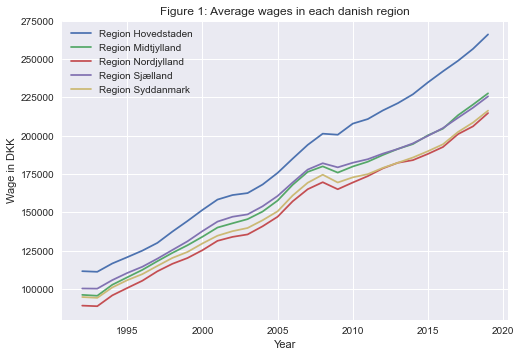

In [460]:

# Yearly averages for each region
grouped_region = wage_long.groupby(['year','Region'], as_index=False)['wage'].mean()

#Figure of days of parental leave
def plot1(fig):
    fig_region = fig.set_index('year')
    fig_region.groupby(['Region'])['wage'].plot(legend=True,
                                                grid=True, 
                                                title='Figure 1: Average wages in each danish region')
    plt.xlabel("Year")
    plt.ylabel("Wage in DKK")
    
plot1(grouped_region)

Wages by age group

In [461]:
#Create color and style cycler
cc = (cycler(color=list('bgrcmyk')) *
      cycler(linestyle=['-', '--']))
plt.rc('lines', linewidth=1.5)
plt.rc('axes', prop_cycle=cc)
#The lines in our plots will now cycle through different colors and styles so that the legend is more readable.

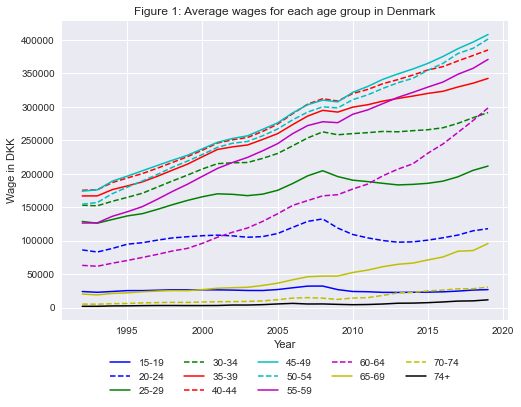

In [462]:
# Yearly averages for each region
grouped_age_group = wage_long.groupby(['year','Age_group'], as_index=False)['wage'].mean()

#Figure of days of parental leave
def plot2(fig):
    fig_age_group = fig.set_index('year')
    fig_age_group.groupby(['Age_group'])['wage'].plot(legend=False,
                                                      grid=True, 
                                                      title='Figure 1: Average wages for each age group in Denmark')
    plt.xlabel("Year")
    plt.ylabel("Wage in DKK")
    # Put the legend below year-axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
    
plot2(grouped_age_group)



Lifecycle wages

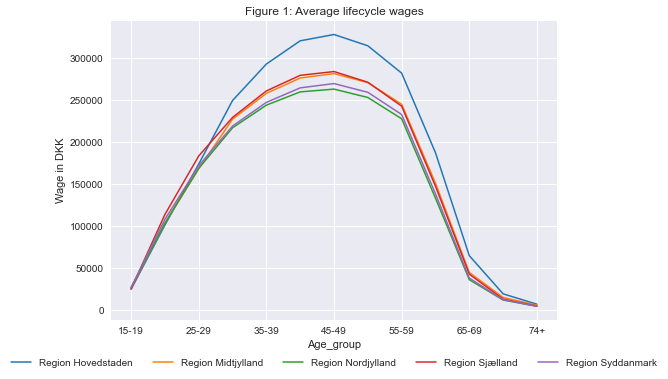

In [463]:
#Reset styles and colors for matplotlib
plt.rcParams['axes.prop_cycle'] = plt.rcParamsDefault['axes.prop_cycle']

# Yearly averages for each region
grouped_all_years = wage_long.groupby(['Age_group','Region'], as_index=False)['wage'].mean()

#Figure of days of parental leave
def plot3(fig):
    fig_age_group = fig.set_index('Age_group')
    fig_age_group.groupby(['Region'])['wage'].plot(legend=False,
                                                      grid=True, 
                                                      title='Figure 1: Average lifecycle wages')
    plt.xlabel("Age_group")
    plt.ylabel("Wage in DKK")
    # Put the legend below year-axis
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=5)
    
plot3(grouped_all_years)

# Conclusion

ADD CONCISE CONLUSION.